In [1]:
import random
import copy
import logging
import sys

# from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210626_stdev_by_failures'

data_script = 'batch_210626_stdev_by_failure'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_mfs = 497
n_grcs = 1847

pattern_type = 'binary'
db = {}

# for model in ['observed', 'local_random', 'global_random']:
for model in ['observed']:
    for scale in [.5, 1.0, .2, .4, .25]:
        model_name = f'{model}_{scale}'
        db[model_name] = compress_pickle.load(
            db_path + \
                f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
                f'scale_{scale}_'
                f'0.3_512_40.gz')


In [2]:
dbb = db['observed_0.5'][0]
s = 0
for try_n in dbb:
    s += try_n[0.025]['grc_stdev_pct']
print(s/len(dbb))

dbb = db['observed_1.0'][0]
s = 0
for try_n in dbb:
    s += try_n[0.025]['grc_stdev_pct']
print(s/len(dbb))

0.07294774458805967
0.06458186634652402


In [42]:
db['observed_0.5'][0][10]

{0.025: {'voi': 1,
  'binary_similarity': 1,
  'hamming_distance': 1,
  'normalized_mse': 1,
  'grc_pop_corr': 1,
  'mf_dim': 1,
  'mf_pop_corr': 1,
  'grc_dim': 1,
  'pct_grc': 0.0,
  'pct_mfs': 0.1,
  'pct_mf_dim': 100.0,
  'num_grcs': 1847,
  'num_mfs': 643,
  'grc_mean': 270,
  'grc_stdev': 18.81488772222678,
  'grc_stdev_pct': 0.06968476934158066},
 0.05: {'voi': 1,
  'binary_similarity': 1,
  'hamming_distance': 1,
  'normalized_mse': 1,
  'grc_pop_corr': 1,
  'mf_dim': 1,
  'mf_pop_corr': 1,
  'grc_dim': 1,
  'pct_grc': 0.0,
  'pct_mfs': 0.1,
  'pct_mf_dim': 100.0,
  'num_grcs': 1847,
  'num_mfs': 643,
  'grc_mean': 267,
  'grc_stdev': 19.209372712298546,
  'grc_stdev_pct': 0.07194521615093089},
 0.075: {'voi': 1,
  'binary_similarity': 1,
  'hamming_distance': 1,
  'normalized_mse': 1,
  'grc_pop_corr': 1,
  'mf_dim': 1,
  'mf_pop_corr': 1,
  'grc_dim': 1,
  'pct_grc': 0.0,
  'pct_mfs': 0.1,
  'pct_mf_dim': 100.0,
  'num_grcs': 1847,
  'num_mfs': 643,
  'grc_mean': 254,
  'grc_

Height: 3.7593984962406015, Aspect: 1.33


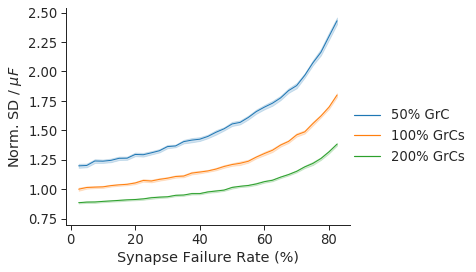

In [2]:

name_map = {
        'observed_1.0': "200% GrCs",
        'observed_0.5': "100% GrCs",
#         'observed_0.4': "+ half conn.",
        'observed_0.25': "50% GrC",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_0.25',
        'observed_0.5',
        'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            if noise >= 1:
                continue
            if noise >= .85:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
#                 model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .07294774458805967,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_stdev_pct_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
    ylim=[.70, None],
    y_axis_label='Norm. SD / $\mu F$',
    x_axis_label='Synapse Failure Rate (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_1806.svg',
    show=True,
    )


Height: 3, Aspect: 1.3333333333333333


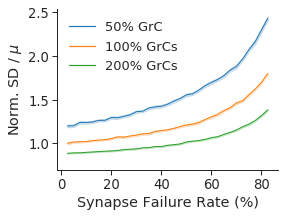

In [5]:

name_map = {
        'observed_1.0': "200% GrCs",
        'observed_0.5': "100% GrCs",
        'observed_0.25': "50% GrC",
}
palette = {
}
mpd = MyPlotData()
for model_name in [
        'observed_0.25',
        'observed_0.5',
        'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        for noise in ress:
            if noise >= 1:
                continue
            if noise >= .85:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
#                 model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .07294774458805967,
                )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='top left', frameon=False, fontsize=13)
    
importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_stdev_pct_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=4,
    height=3,
    ylim=[.70, None],
    y_axis_label='Norm. SD / $\mu$',
    x_axis_label='Synapse Failure Rate (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_fig.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3.7593984962406015, Aspect: 1.33


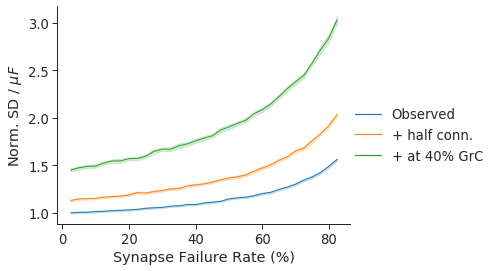

In [16]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half conn.",
        'observed_0.4': "Observed",
        'observed_0.2': "w/ half conn.",
}
name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "+ half conn.",
#         'observed_0.4': "+ half conn.",
        'observed_0.2': "+ at 40% GrC",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_1.0',
        'observed_0.5',
        'observed_0.2',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            if noise >= 1:
                continue
            if noise >= .85:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
#                 model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .06458186634652402,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_stdev_pct_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Norm. SD / $\mu F$',
    x_axis_label='Synapse Failure Rate (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_1805.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


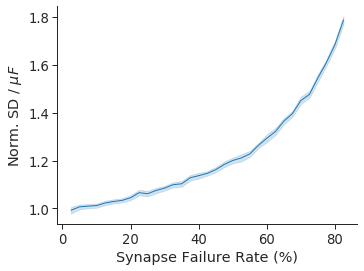

In [8]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half GrC-PC conn.",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_0.5',
#         'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            if noise >= 1:
                continue
            if noise >= .85:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .0735,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_stdev_pct_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Norm. SD / $\mu F$',
    x_axis_label='Synapse Failure Rate (%)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_1804.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


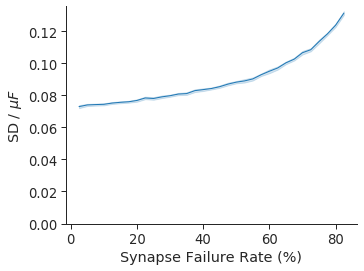

In [32]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half GrC-PC conn.",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_0.5',
#         'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            if noise >= 1:
                continue
            if noise >= .85:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .0735,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_stdev_pct',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
    ylim=[0, None],
    y_axis_label='SD / $\mu F$',
    x_axis_label='Synapse Failure Rate (%)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_1805.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-23c57676f473>", line 62, in <module>
    importlib.reload(my_plot); my_plot.my_relplot(
  File "/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/my_plot.py", line 361, in my_relplot
    plt.savefig(save_filename, bbox_inches='tight', transparent=True)
  File "/usr/lib/python3/dist-packages/matplotlib/pyplot.py", line 722, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/figure.py", line 2180, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/backend_bases.py", line 2082, in print_figure
    result = print_method(
  File "/usr/lib/python3/dist-packages/matplotlib/backends/backend_svg.py", line 1190, in print_svg
    with cbook.open_file_cm(filenam

OSError: [Errno 107] Transport endpoint is not connected: 'plot_210626_stdev_by_failures.svg'

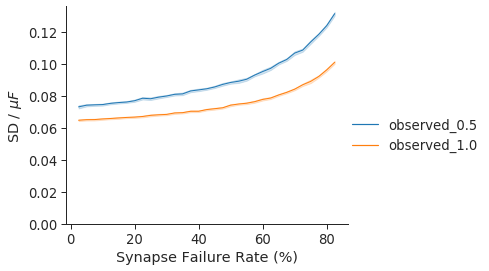

In [44]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half GrC-PC conn.",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_0.5',
        'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            if noise >= 1:
                continue
            if noise >= .85:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .0735,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_stdev_pct',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
    ylim=[0, None],
    y_axis_label='SD / $\mu F$',
    x_axis_label='Synapse Failure Rate (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}.svg',
    show=True,
)